# Tutorial on Data Preprocessing (US Wildfires)

In this lesson, we will go through an example of how to do initial exploratory data analysis and data preprocessing for machine learning. To do this, we will use a data set of US Wildfires from 1990 - 2016. This data set includes the location and time of 50,000 recent wildfires, as well as information about the type of vegetation and co-located meteorological data during the time when the fires occurred. It is a subset of a much larger data set of 1.8 million US Wildfires.

The data set is available on Kaggle: [US Wildfires and other attributes](https://www.kaggle.com/datasets/capcloudcoder/us-wildfire-data-plus-other-attributes?select=Wildfire_att_description.txt)

We'll start by downloading the data set and then we will explore the variables in the data set and pre-process the data for use with machine learning using `pandas` and the `sci-kit learn` python packages.

## Download the data set

In [1]:
# To facilitate downloading data from Kaggle, we can install this python package
!pip install kagglehub

In [2]:
import kagglehub
import os

In [3]:
datapath = kagglehub.dataset_download("capcloudcoder/us-wildfire-data-plus-other-attributes")

print("Path to dataset files:", datapath)

Path to dataset files: /Users/karalamb/.cache/kagglehub/datasets/capcloudcoder/us-wildfire-data-plus-other-attributes/versions/4


In [4]:
os.listdir(datapath)

['FW_Veg_Rem_Combined.csv', 'Wildfire_att_description.txt']

The data set that we downloaded contains two files. The first is a csv that includes the variables and data, and the txt file provides metadata that described the variables that are contained in the csv file. We will start by loading and printing the metadata from the txt file.

In [5]:
with open(os.path.join(datapath,'Wildfire_att_description.txt'), 'r') as file:
    content = file.read()
print(content)

fire_name            ,Name of Fire
fire_size           ,Size of Fire 
fire_size_class      ,Class of Fire Size (A-G)
stat_cause_descr     ,Cause of Fire
latitude            ,Latitude of Fire
longitude           ,Longitude of Fire
state                ,State of Fire
discovery_month      ,Month in which Fire was discovered
putout_time         ,time it took to putout the fire
disc_pre_year         ,year in which the fire was discovered

Vegetation            ,Dominant vegetation in the areas (1:Tropical Evergreen Broadleaf Forest,2:Tropical Deciduous Broadleaf Forest,3:Temperate Evergreen Broadleaf Forest ,
4:Temperate Evergreen Needleleaf Forest TmpENF,5:Temperate Deciduous Broadleaf Forest,6:Boreal Evergreen Needleleaf Forest,7:Boreal Deciduous Needleleaf Forest, 8:Savanna , 9:C3 Grassland/Steppe, 10:C4 Grassland/Steppe, 11:Dense Shrubland 12:Open Shrubland, 13:Tundra Tundra, 14:Desert,15:Polar Desert/Rock/Ice, 16:Secondary Tropical Evergreen Broadleaf Forest, 17:Secondary Tropical Deci

We will use the `pandas` package to read in the csv file.

In [6]:
import pandas as pd

wildfiresdb = pd.read_csv(os.path.join(datapath,'FW_Veg_Rem_Combined.csv'))

## Explore the .csv file

In [7]:
wildfiresdb.head()

Unnamed: 0.1  Unnamed: 0 fire_name  fire_size fire_size_class  \
0             0           0       NaN       10.0               C   
1             1           1       NaN        3.0               B   
2             2           2       NaN       60.0               C   
3             3           3    WNA  1        1.0               B   
4             4           4       NaN        2.0               B   

    stat_cause_descr   latitude   longitude state disc_clean_date  ...  \
0  Missing/Undefined  18.105072  -66.753044    PR       2/11/2007  ...   
1              Arson  35.038330  -87.610000    TN      12/11/2006  ...   
2              Arson  34.947800  -88.722500    MS       2/29/2004  ...   
3     Debris Burning  39.641400 -119.308300    NV        6/6/2005  ...   
4      Miscellaneous  30.700600  -90.591400    LA       9/22/1999  ...   

  Wind_cont Hum_pre_30 Hum_pre_15  Hum_pre_7   Hum_cont Prec_pre_30  \
0  3.250413  78.216590  76.793750  76.381579  78.724370         0.0   
1  2.122320  70.840000  65.858911  55.505882  81.682678        59.8   
2  3.369050  75.531629  75.868613  76.812834  65.063800       168.8   
3  0.000000  44.778429  37.140811  35.353846   0.000000        10.4   
4 -1.000000  -1.000000  -1.000000  -1.000000  -1.000000        -1.0   

   Prec_pre_15 Prec_pre_7 Prec_cont  remoteness  
0          0.0        0.0       0.0    0.017923  
1          8.4        0.0      86.8    0.184355  
2         42.2       18.1     124.5    0.194544  
3          7.2        0.0       0.0    0.487447  
4         -1.0       -1.0      -1.0    0.214633  

[5 rows x 43 columns]

In [8]:
wildfiresdb.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fire_name', 'fire_size',
       'fire_size_class', 'stat_cause_descr', 'latitude', 'longitude', 'state',
       'disc_clean_date', 'cont_clean_date', 'discovery_month',
       'disc_date_final', 'cont_date_final', 'putout_time', 'disc_date_pre',
       'disc_pre_year', 'disc_pre_month', 'wstation_usaf', 'dstation_m',
       'wstation_wban', 'wstation_byear', 'wstation_eyear', 'Vegetation',
       'fire_mag', 'weather_file', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')

In [9]:
wildfiresdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      55367 non-null  int64  
 1   Unnamed: 0        55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16  disc_pre_year     55367 non-null  int64 

In [10]:
wildfiresdb.describe()

Unnamed: 0.1    Unnamed: 0      fire_size      latitude     longitude  \
count  55367.000000  55367.000000   55367.000000  55367.000000  55367.000000   
mean   27683.000000  27683.000000    2104.645161     36.172866    -94.757971   
std    15983.220514  15983.220514   14777.005364      6.724348     15.878194   
min        0.000000      0.000000       0.510000     17.956533   -165.936000   
25%    13841.500000  13841.500000       1.200000     32.265960   -102.541513   
50%    27683.000000  27683.000000       4.000000     34.600000    -91.212359   
75%    41524.500000  41524.500000      20.000000     38.975235    -82.847500   
max    55366.000000  55366.000000  606945.000000     69.849500    -65.285833   

       disc_pre_year     dstation_m  wstation_wban  wstation_byear  \
count   55367.000000   55367.000000   55367.000000    55367.000000   
mean     2003.765474   40256.474678   61029.607311     1979.341900   
std         6.584889   25272.081410   40830.393541       23.372803   
min      1991.000000       6.166452     100.000000     1931.000000   
25%      1999.000000   21373.361515   13927.000000     1973.000000   
50%      2005.000000   35621.334820   73803.000000     1978.000000   
75%      2009.000000   53985.904315   99999.000000     2004.000000   
max      2015.000000  224153.661800   99999.000000     2014.000000   

       wstation_eyear  ...     Wind_cont    Hum_pre_30    Hum_pre_15  \
count    55367.000000  ...  55367.000000  55367.000000  55367.000000   
mean      2015.480990  ...      1.132284     40.781796     38.453935   
std          6.767851  ...      2.030611     31.086856     31.042541   
min       1993.000000  ...     -1.000000     -1.000000     -1.000000   
25%       2010.000000  ...     -1.000000     -1.000000     -1.000000   
50%       2020.000000  ...      0.000000     55.657480     51.753846   
75%       2020.000000  ...      2.848603     67.384352     65.911469   
max       2020.000000  ...     24.200000     96.000000     94.000000   

          Hum_pre_7      Hum_cont   Prec_pre_30   Prec_pre_15    Prec_pre_7  \
count  55367.000000  55367.000000  55367.000000  55367.000000  55367.000000   
mean      37.001865     25.056738     26.277046     11.654253      4.689920   
std       30.827885     31.187638    112.050198     56.920510     31.205327   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       48.230769      0.000000      0.000000      0.000000      0.000000   
75%       64.645296     60.193606     18.900000      3.600000      0.000000   
max       96.000000     94.000000  13560.800000   2527.000000   1638.000000   

          Prec_cont    remoteness  
count  55367.000000  55367.000000  
mean      15.590440      0.236799  
std       59.757113      0.144865  
min       -1.000000      0.000000  
25%       -1.000000      0.137800  
50%        0.000000      0.202114  
75%        0.000000      0.284782  
max     2126.000000      1.000000  

[8 rows x 29 columns]

## Explore the distributions of the variables in our data set

Since we have 43 variables, we will focus on a subset of these variables for now. We want to understand how the variables are distributed. We'll focus on the size of the fire, its location, how long it took to put out, the year it was discovered, the type of vegetation, and historical metereological variables (Temperature, Wind, Humidity, and Precipitation) averaged over the time it took to put out the fire.

In [11]:
variables = ["fire_size","fire_size_class","latitude","longitude","putout_time","disc_pre_year","Vegetation","Temp_cont","Wind_cont","Hum_cont","Prec_cont"]

First we will put this subsection of the data into a `DataFrame` object by using the variable names we have chosen.

In [12]:
df = wildfiresdb[variables].copy()
df.head()

fire_size fire_size_class   latitude   longitude  \
0       10.0               C  18.105072  -66.753044   
1        3.0               B  35.038330  -87.610000   
2       60.0               C  34.947800  -88.722500   
3        1.0               B  39.641400 -119.308300   
4        2.0               B  30.700600  -90.591400   

                 putout_time  disc_pre_year  Vegetation  Temp_cont  Wind_cont  \
0                        NaN           2007          12  24.527961   3.250413   
1                        NaN           2006          15  10.448298   2.122320   
2                        NaN           2004          16  13.696600   3.369050   
3  0 days 00:00:00.000000000           2005           0   0.000000   0.000000   
4                        NaN           1999          12  -1.000000  -1.000000   

    Hum_cont  Prec_cont  
0  78.724370        0.0  
1  81.682678       86.8  
2  65.063800      124.5  
3   0.000000        0.0  
4  -1.000000       -1.0

You can explore the data in various ways. 

First, how many samples are in our data set? 

In [13]:
print("Number of rows: " + str(len(df)))

Number of rows: 55367


We can use `matplotlib` to visualize the marginal distributions of our variables using the `hist` function:

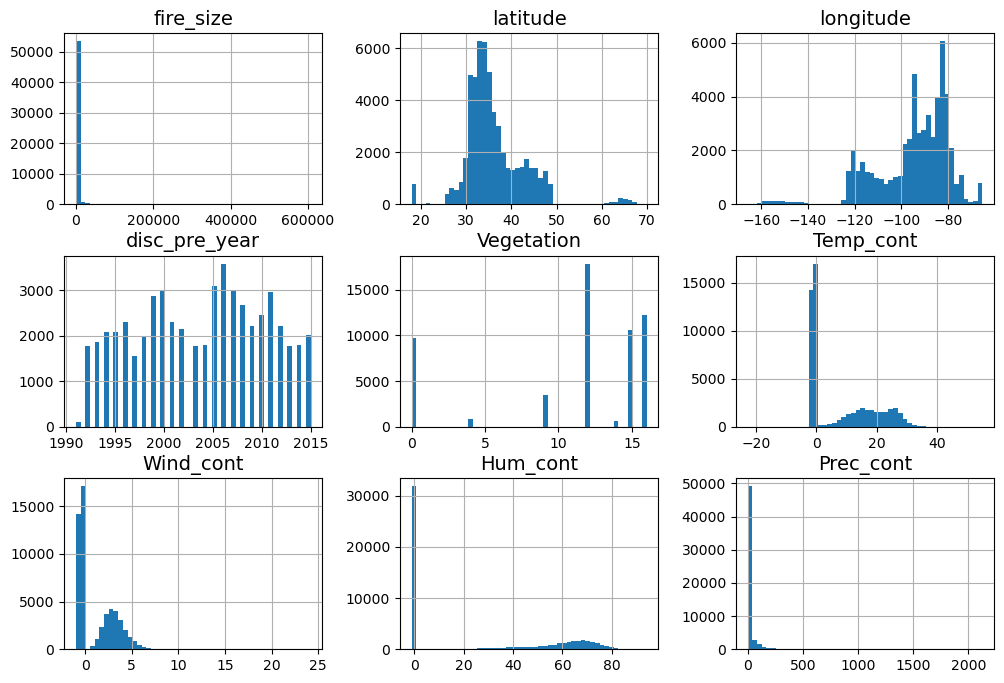

In [14]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
#save_fig("attribute_histogram_plots")  # extra code
plt.show()

Another useful python package that we can use is `seaborn`.

*Warning! Seaborn can typically be quite slow, especially if you have a large data set or many variables. One simple way to deal with this is to randomly subsample the data, and visualize only a fraction of the data set.*

In [15]:
import seaborn as sns

We can look at how the variables are correlated with one another using the `PairGrid` function

We need both of the lines below to create the plot. The first line just constructs a blank grid of subplots with each row and column corresponding to a numeric value in the data set. The second line draws a bivariate plot on every axis.

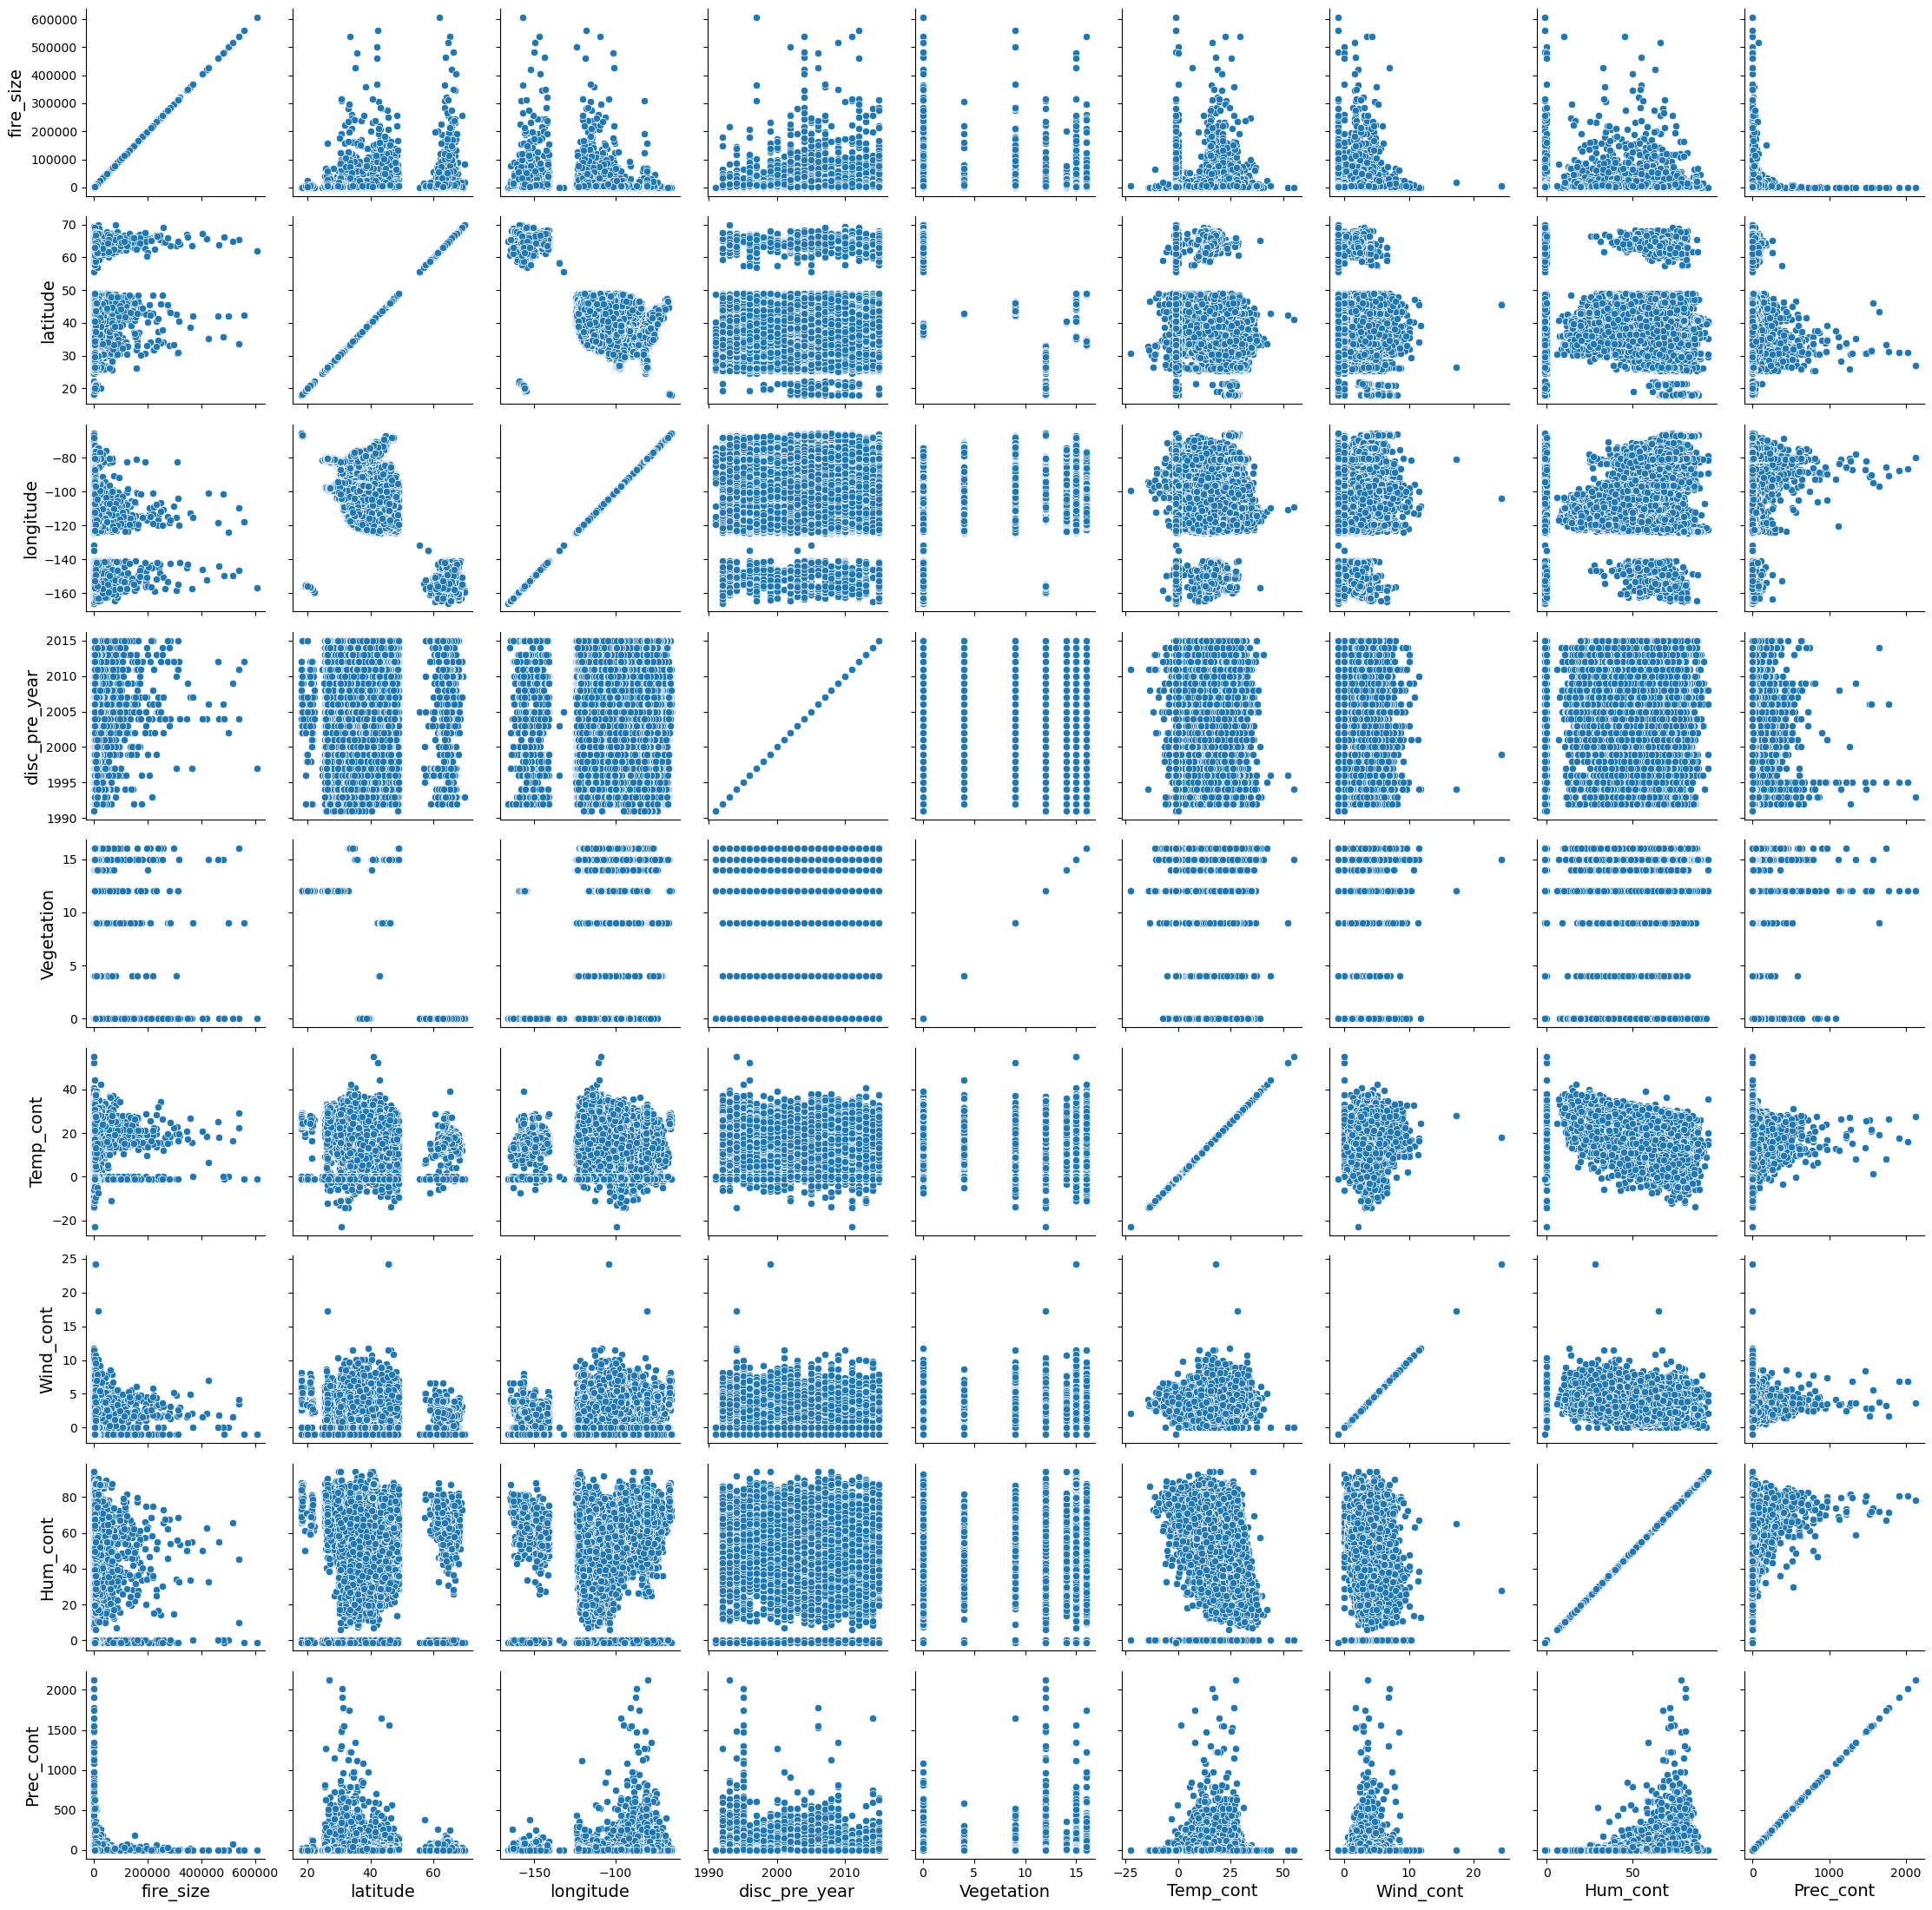

In [16]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

We can also look for correlations between the variables in our data set, using the `pandas` DataFrame `corr` method. The `numeric_only` argument needs to be set to True to avoid an error. This makes sure it only uses the variables in our dataframe that have numeric values.

In [18]:
corr_matrix = df.corr(numeric_only=True)

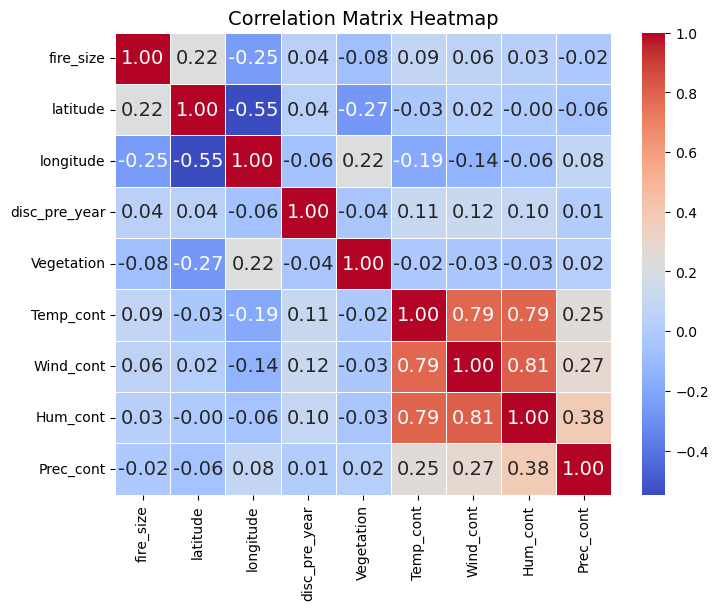

In [19]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Visualize the data spatially
Since we have latitude and longitude, we can also visualize the spatial distribution of the points in our data set. Looking at fire size, it's clear that the largest fires occur for the most part in the Western US.

/opt/anaconda3/envs/ML4Climate2025/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


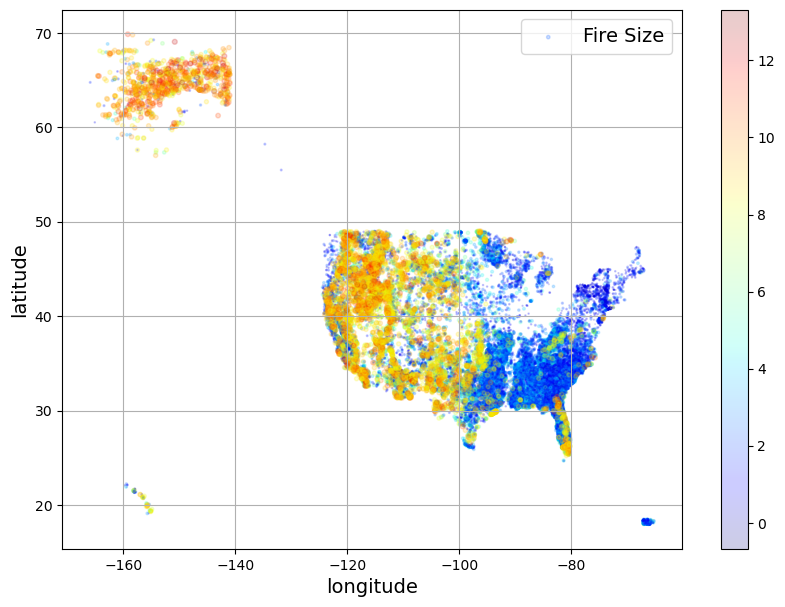

In [15]:
import numpy as np

df.plot(kind='scatter',x='longitude',y='latitude',grid=True,alpha=0.2,
                s = np.log(df["fire_size"]),label = "Fire Size",
                c = np.log(df["fire_size"]),cmap="jet",colorbar = True, legend = True, sharex=False,figsize=(10,7))
plt.show()

## Handling missing/irregular data

The column `putout_time` contains many NaN values, because data on how long it took to put out the fire is not available for every fire. 

First, we can try to understand why data might be missing.

In [16]:
no_putout_time = pd.isna(df['putout_time'])

Let's compare the mean size of the fires which have no data for `putout_time` to the mean size of the fires which do have data:

In [17]:
print("Mean size of fires with NaN for putout_time:")
(df['fire_size'][no_putout_time]).mean()

Mean size of fires with NaN for putout_time:


415.81547412190747

In [18]:
print("Mean size of fires with values for putout_time:")
(df['fire_size'][~no_putout_time]).mean()

Mean size of fires with values for putout_time:


3818.859229537432

This suggests that smaller fires typically don't have data about `putout_time` associated with them.

`putout_time` is currently formatted as string timestamps, rather than floating point numbers, and they are unfortunately not all in the same format. We can see this by printing out the unique values from this column.

In [19]:
unique = df['putout_time'].unique()

In [20]:
unique

array([nan, '0 days 00:00:00.000000000', '1 days 00:00:00.000000000',
       '2 days 00:00:00.000000000', '3 days 00:00:00.000000000',
       '26 days 00:00:00.000000000', '9 days 00:00:00.000000000',
       '4 days 00:00:00.000000000', '18 days 00:00:00.000000000',
       '5 days 00:00:00.000000000', '16 days 00:00:00.000000000',
       '7 days 00:00:00.000000000', '19 days 00:00:00.000000000',
       '12 days 00:00:00.000000000', '6 days 00:00:00.000000000',
       '167 days 00:00:00.000000000', '8 days 00:00:00.000000000',
       '69 days 00:00:00.000000000', '31 days 00:00:00.000000000',
       '36 days 00:00:00.000000000', '29 days 00:00:00.000000000',
       '15 days 00:00:00.000000000', '92 days 00:00:00.000000000',
       '91 days 00:00:00.000000000', '10 days 00:00:00.000000000',
       '11 days 00:00:00.000000000', '63 days 00:00:00.000000000',
       '118 days 00:00:00.000000000', '13 days 00:00:00.000000000',
       '59 days 00:00:00.000000000', '93 days 00:00:00.000000000'

Since the information that we are interested in is the first "word" in each string, we can use the string split method to get the number of days it took to put out a fire, and put this into a new column in our data frame. We also want the variable to be a floating point number (not a string) so that we can use it in our (future) machine learning model.

In [21]:
df['putout_time_float'] = df['putout_time'].str.split().str[0].astype(float)
df['putout_time_float']

0         NaN
1         NaN
2         NaN
3         0.0
4         NaN
         ... 
55362     NaN
55363    22.0
55364     NaN
55365    43.0
55366     NaN
Name: putout_time_float, Length: 55367, dtype: float64

In [22]:
df['putout_time_float'].describe()

count    27477.000000
mean         6.033592
std         27.803757
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       3287.000000
Name: putout_time_float, dtype: float64

In [23]:
df

fire_size fire_size_class   latitude   longitude  \
0           10.0               C  18.105072  -66.753044   
1            3.0               B  35.038330  -87.610000   
2           60.0               C  34.947800  -88.722500   
3            1.0               B  39.641400 -119.308300   
4            2.0               B  30.700600  -90.591400   
...          ...             ...        ...         ...   
55362     6289.0               G  39.180000  -96.784167   
55363    70868.0               G  38.342719 -120.695967   
55364     5702.0               G  37.262607 -119.511139   
55365     3261.0               F  40.604300 -123.080450   
55366    76067.0               G  38.843988 -122.759707   

                     putout_time  disc_pre_year  Vegetation  Temp_cont  \
0                            NaN           2007          12  24.527961   
1                            NaN           2006          15  10.448298   
2                            NaN           2004          16  13.696600   
3      0 days 00:00:00.000000000           2005           0   0.000000   
4                            NaN           1999          12  -1.000000   
...                          ...            ...         ...        ...   
55362                        NaN           2015           0  13.242324   
55363                         22           2015           0  -1.000000   
55364                        NaN           2015           0  27.646067   
55365                         43           2015          15  -1.000000   
55366                        NaN           2015           0  19.016883   

       Wind_cont   Hum_cont  Prec_cont  putout_time_float  
0       3.250413  78.724370        0.0                NaN  
1       2.122320  81.682678       86.8                NaN  
2       3.369050  65.063800      124.5                NaN  
3       0.000000   0.000000        0.0                0.0  
4      -1.000000  -1.000000       -1.0                NaN  
...          ...        ...        ...                ...  
55362   3.804803  55.042092      249.0                NaN  
55363  -1.000000  -1.000000       -1.0               22.0  
55364   2.529158  35.924406        0.0                NaN  
55365  -1.000000  -1.000000       -1.0               43.0  
55366   1.208073  58.063802       18.8                NaN  

[55367 rows x 12 columns]

We'll drop the original column now, since we have fixed the irregular data

In [24]:
df = df.drop(['putout_time'],axis=1)
df.head()

fire_size fire_size_class   latitude   longitude  disc_pre_year  \
0       10.0               C  18.105072  -66.753044           2007   
1        3.0               B  35.038330  -87.610000           2006   
2       60.0               C  34.947800  -88.722500           2004   
3        1.0               B  39.641400 -119.308300           2005   
4        2.0               B  30.700600  -90.591400           1999   

   Vegetation  Temp_cont  Wind_cont   Hum_cont  Prec_cont  putout_time_float  
0          12  24.527961   3.250413  78.724370        0.0                NaN  
1          15  10.448298   2.122320  81.682678       86.8                NaN  
2          16  13.696600   3.369050  65.063800      124.5                NaN  
3           0   0.000000   0.000000   0.000000        0.0                0.0  
4          12  -1.000000  -1.000000  -1.000000       -1.0                NaN

If we look at the meteorological variables (Prec_cont, Wind_cont, Temp_cont, Hum_cont), we also notice that the distributions look strange. This is because they have 0 and -1 for missing values. We can guess this because it's not physically reasonable that these values are negative, or that the Wind_cont, Temp_cont, Hum_cont are exactly 0.0000, especially during fire season.

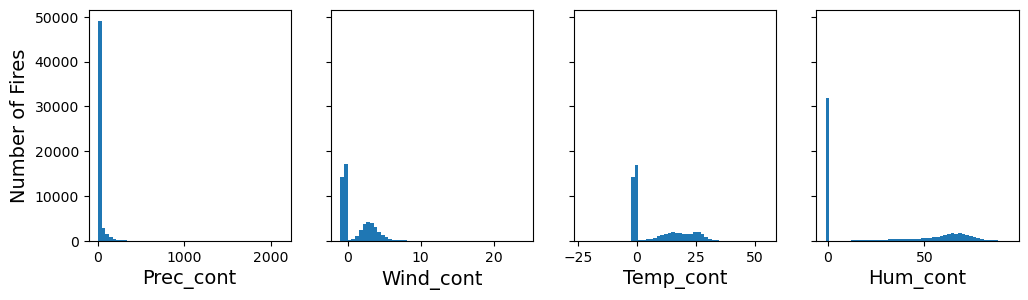

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
axs[0].hist(df["Prec_cont"], bins=50)
axs[1].hist(df["Wind_cont"], bins=50)
axs[2].hist(df["Temp_cont"], bins=50)
axs[3].hist(df["Hum_cont"], bins=50)
axs[0].set_xlabel("Prec_cont")
axs[1].set_xlabel("Wind_cont")
axs[2].set_xlabel("Temp_cont")
axs[3].set_xlabel("Hum_cont")
axs[0].set_ylabel("Number of Fires")

plt.show()

In [26]:
df["Temp_cont"]

0        24.527961
1        10.448298
2        13.696600
3         0.000000
4        -1.000000
           ...    
55362    13.242324
55363    -1.000000
55364    27.646067
55365    -1.000000
55366    19.016883
Name: Temp_cont, Length: 55367, dtype: float64

We can replace these suspicious values with NaN's using the `replace` method.

In [27]:
df["Temp_cont"] = df["Temp_cont"].replace([0.0000,-1.0000], np.nan)
df["Hum_cont"] = df["Hum_cont"].replace([0.0000,-1.0000], np.nan)
df["Wind_cont"] = df["Wind_cont"].replace([0.0000,-1.0000], np.nan)
df["Prec_cont"] = df["Prec_cont"].replace([-1.0000], np.nan)

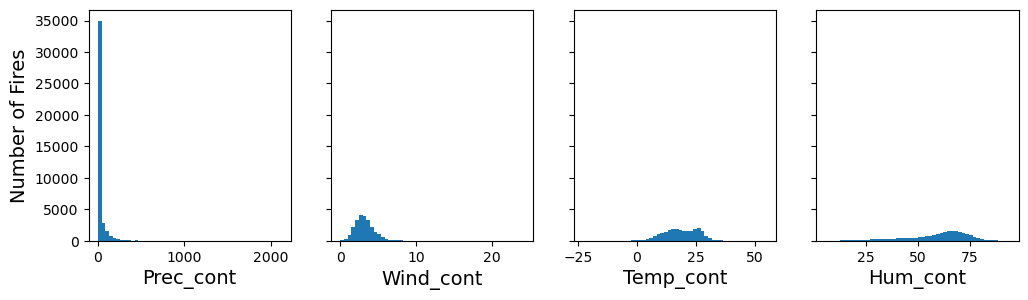

In [28]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
axs[0].hist(df["Prec_cont"], bins=50)
axs[1].hist(df["Wind_cont"], bins=50)
axs[2].hist(df["Temp_cont"], bins=50)
axs[3].hist(df["Hum_cont"], bins=50)
axs[0].set_xlabel("Prec_cont")
axs[1].set_xlabel("Wind_cont")
axs[2].set_xlabel("Temp_cont")
axs[3].set_xlabel("Hum_cont")
axs[0].set_ylabel("Number of Fires")

plt.show()

Now that we have fixed the irregular data, we need to figure out what to do with the NaN values.

One very simple way to deal with these missing data is to just drop all of the rows where there are no values for `putout_time`, using the `dropna()` method:

In [29]:
df_cleaned = df.dropna().copy()

A disadvantage of dropping rows it that we end up with less data, so other approaches such as imputation can be preferable if our data set is small. After removing all of the bad rows, we are down to 10% of our original data set!

In [30]:
print("Number of rows (before removing NaN's): " + str(len(df)))
print("Number of rows (after removing NaN's): " + str(len(df_cleaned)))

Number of rows (before removing NaN's): 55367
Number of rows (after removing NaN's): 5892


We can also remove the very high outliers for `putout_time_float` (>99.995%):

In [31]:
q_hi  = df_cleaned['putout_time_float'].quantile(0.99995)
print(q_hi)

df_filtered = df_cleaned[(df_cleaned['putout_time_float'] < q_hi)].dropna().copy()

338.5995000000421


In [32]:
print("Number of rows (before removing outliers): " + str(len(df_cleaned)))
print("Number of rows (after removing outliers): " + str(len(df_filtered)))

Number of rows (before removing outliers): 5892
Number of rows (after removing outliers): 5891


We can also fill the NaN's with a value instead, using the `fillna()` method:

In [33]:
df_filled = df.fillna(0).copy()

In [34]:
df_filled 

fire_size fire_size_class   latitude   longitude  disc_pre_year  \
0           10.0               C  18.105072  -66.753044           2007   
1            3.0               B  35.038330  -87.610000           2006   
2           60.0               C  34.947800  -88.722500           2004   
3            1.0               B  39.641400 -119.308300           2005   
4            2.0               B  30.700600  -90.591400           1999   
...          ...             ...        ...         ...            ...   
55362     6289.0               G  39.180000  -96.784167           2015   
55363    70868.0               G  38.342719 -120.695967           2015   
55364     5702.0               G  37.262607 -119.511139           2015   
55365     3261.0               F  40.604300 -123.080450           2015   
55366    76067.0               G  38.843988 -122.759707           2015   

       Vegetation  Temp_cont  Wind_cont   Hum_cont  Prec_cont  \
0              12  24.527961   3.250413  78.724370        0.0   
1              15  10.448298   2.122320  81.682678       86.8   
2              16  13.696600   3.369050  65.063800      124.5   
3               0   0.000000   0.000000   0.000000        0.0   
4              12   0.000000   0.000000   0.000000        0.0   
...           ...        ...        ...        ...        ...   
55362           0  13.242324   3.804803  55.042092      249.0   
55363           0   0.000000   0.000000   0.000000        0.0   
55364           0  27.646067   2.529158  35.924406        0.0   
55365          15   0.000000   0.000000   0.000000        0.0   
55366           0  19.016883   1.208073  58.063802       18.8   

       putout_time_float  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
55362                0.0  
55363               22.0  
55364                0.0  
55365               43.0  
55366                0.0  

[55367 rows x 11 columns]

Rather than filling with a specific value, it's also possible to fill with the `median` or `mean` of the column.

In [35]:
df_fill_mean= df.copy()

meantime = df['putout_time_float'].mean()
df_fill_mean['putout_time_float'].fillna(meantime,inplace=True)
df_fill_mean

fire_size fire_size_class   latitude   longitude  disc_pre_year  \
0           10.0               C  18.105072  -66.753044           2007   
1            3.0               B  35.038330  -87.610000           2006   
2           60.0               C  34.947800  -88.722500           2004   
3            1.0               B  39.641400 -119.308300           2005   
4            2.0               B  30.700600  -90.591400           1999   
...          ...             ...        ...         ...            ...   
55362     6289.0               G  39.180000  -96.784167           2015   
55363    70868.0               G  38.342719 -120.695967           2015   
55364     5702.0               G  37.262607 -119.511139           2015   
55365     3261.0               F  40.604300 -123.080450           2015   
55366    76067.0               G  38.843988 -122.759707           2015   

       Vegetation  Temp_cont  Wind_cont   Hum_cont  Prec_cont  \
0              12  24.527961   3.250413  78.724370        0.0   
1              15  10.448298   2.122320  81.682678       86.8   
2              16  13.696600   3.369050  65.063800      124.5   
3               0        NaN        NaN        NaN        0.0   
4              12        NaN        NaN        NaN        NaN   
...           ...        ...        ...        ...        ...   
55362           0  13.242324   3.804803  55.042092      249.0   
55363           0        NaN        NaN        NaN        NaN   
55364           0  27.646067   2.529158  35.924406        0.0   
55365          15        NaN        NaN        NaN        NaN   
55366           0  19.016883   1.208073  58.063802       18.8   

       putout_time_float  
0               6.033592  
1               6.033592  
2               6.033592  
3               0.000000  
4               6.033592  
...                  ...  
55362           6.033592  
55363          22.000000  
55364           6.033592  
55365          43.000000  
55366           6.033592  

[55367 rows x 11 columns]

Finally, we can interpolate, using the `interpolate()` method. Interpolate refers to filling in using the values based on estimating from surrounding non-NaN data in a column.

In [36]:
df_interp = df.interpolate().copy()

Interpolation doesn't make a lot of sense for this data set since the fires are independent of one another. Interpolation makes more sense in the context of a time series, where we are missing specific values in our sequence. To illustrate this, we will look at the effect of using the `Interpolate()` method on a sine wave that has 20% of its data missing.

This code just generates the time series and puts it into a dataframe

In [37]:
np.random.seed(42)                      
n = 100
t = np.linspace(0, 2 * np.pi, n)         # 0 → 2π
y = np.sin(t)
y_noisy = y+ np.random.normal(0, 0.1, n)

# knock out ~10 % of points
mask = np.random.choice(n, size=int(0.20 * n), replace=False)
y_noisy[mask] = np.nan

dfsine = pd.DataFrame({"t": t, "sine": y,"noisy_sine": y_noisy})

We can apply the interpolate function to the sine wave to estimate the missing values.

In [38]:
dfsine_interp = dfsine.interpolate().copy()

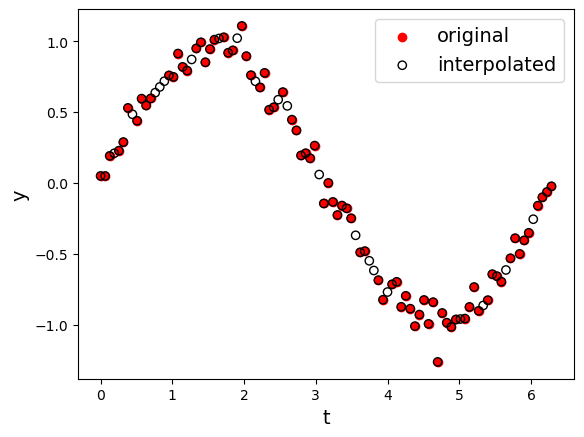

In [39]:
plt.scatter(dfsine['t'],dfsine['noisy_sine'],marker='o',facecolors='r',edgecolors='r',label="original")
plt.scatter(dfsine_interp['t'],dfsine_interp['noisy_sine'],marker='o',facecolors='none',edgecolors='k',label="interpolated")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()

Using interpolation or filling missing values can potentially bias our data sets, so it's important to keep in mind what problem we are interested in solving when choosing a method to deal with missing data.

## Feature Scaling
The `sci-kit learn` package has a number of built in functions for scaling variables.

MinMaxScaler scales value between a minimum and maximum. We can set what range we want to end up with.

For a sample x, the MinMaxScaler is calculated as 

~~~
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
~~~

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
latitude_min_max_scaled = min_max_scaler.fit_transform(df[["latitude"]])

The StandardScaler removes the mean and scales to unit variance. For a sample x, the standard scaler is calculated as

~~~
z = (x-u)/s
~~~

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
std_scaler = StandardScaler()
latitude_std_scaled = std_scaler.fit_transform(df[["latitude"]])

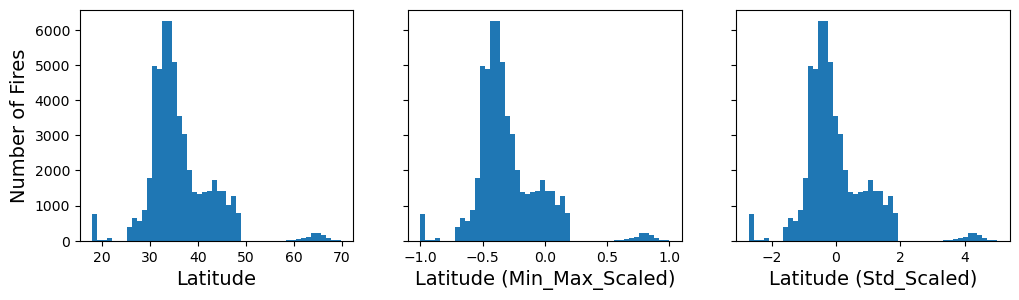

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
axs[0].hist(df["latitude"], bins=50)
axs[1].hist(latitude_min_max_scaled, bins=50)
axs[2].hist(latitude_std_scaled, bins=50)
axs[0].set_xlabel("Latitude")
axs[1].set_xlabel("Latitude (Min_Max_Scaled)")
axs[2].set_xlabel("Latitude (Std_Scaled)")
axs[0].set_ylabel("Number of Fires")

plt.show()

We can also do custom transformations using `sci-kit learn`'s FunctionTransformer method. For example, fire_size is not normally distributed, but rather strongly skewed towards smaller fires. We can log scale this variable using the FunctionTransformer

In [45]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_fire_size = log_transformer.transform(df_filtered[["fire_size"]])

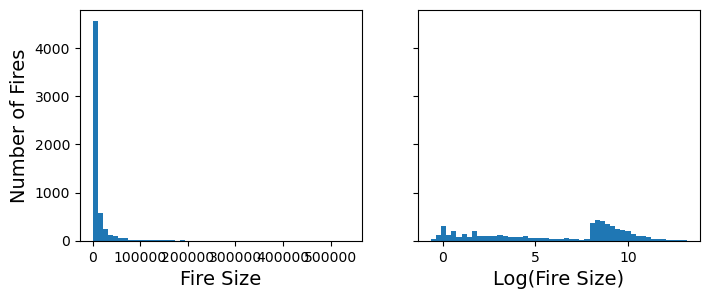

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axs[0].hist(df_filtered["fire_size"], bins=50)
axs[1].hist(log_fire_size, bins=50)
axs[0].set_xlabel("Fire Size")
axs[1].set_xlabel("Log(Fire Size)")
axs[0].set_ylabel("Number of Fires")

plt.show()

In [47]:
df_filtered["log_fire_size"] = log_fire_size

## Encoding categorical variables

The `fire_size_class` is a categorical variable (it is a letter between A - G).

In [48]:
fire_size_class = df[["fire_size_class"]]
fire_size_class.head(8)

fire_size_class
0               C
1               B
2               C
3               B
4               B
5               B
6               B
7               B

We can also check if our data set is balanced or not, by printing out the number of samples of each class in our data set.

In [49]:
fire_size_class_counts = df["fire_size_class"].value_counts()
print(fire_size_class_counts)

fire_size_class
B    36522
C    10811
G     3972
F     1968
D     1394
E      700
Name: count, dtype: int64


There are several different ways that we can encode this categorical variable for machine learning models. One is using the OrdinalEncoder function from `sci-kit learn`. This function will transform categories (B,C,D,E,...) to an integer label (0,1,2,3,...).  

We will end up with a single column per original feature (or variable) in our data set. 

OrdinalEncoder can be useful if our categories have a particular ordering to them (like fire size class does). However, it might not be a good choice for a feature like the `state` in which a fire occured, since we don't have a particular ordering to the values in our data set in that case.

In [50]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
fire_size_class_encoded = ordinal_encoder.fit_transform(fire_size_class)

In [53]:
fire_size_class

fire_size_class
0                   C
1                   B
2                   C
3                   B
4                   B
...               ...
55362               G
55363               G
55364               G
55365               F
55366               G

[55367 rows x 1 columns]

In [51]:
fire_size_class_encoded[:8]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [52]:
ordinal_encoder.categories_

[array(['B', 'C', 'D', 'E', 'F', 'G'], dtype=object)]

An alternative way that we can encode a categorical variable is using the OneHotEncoder function from `sci-kit learn`. This function converts each category into a separate binary column. For example, a sample that is class B, would be one hot encoded as 
~~~
[1, 0, 0, 0, 0, 0]
~~~

or for a sample that is a fire of class E, it would be encoded as 
~~~
[0, 0, 0, 1, 0, 0]
~~~

We will end up with as many columns as we have classes in our data set. For the fire_size_class variable, this would add 6 columns, since there are 6 possible classes represented in our data set.

This is best to use when our categorical variables are nominal (unordered), and is best for many of the types of models that assume inputs are numerical and unstructured (linear models, neural networks), which we will discuss later in the course.

In [59]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
fire_size_class_hot = cat_encoder.fit_transform(fire_size_class)

In [60]:
fire_size_class_hot

<55367x6 sparse matrix of type '<class 'numpy.float64'>'
	with 55367 stored elements in Compressed Sparse Row format>

In [61]:
fire_size_class_hot.toarray()

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [62]:
cat_encoder.categories_

[array(['B', 'C', 'D', 'E', 'F', 'G'], dtype=object)]

## Creating a pipeline to preprocess our features

In [63]:
df_filtered

fire_size fire_size_class   latitude   longitude  disc_pre_year  \
36        1420.0               F  33.241800 -104.912200           1994   
56          15.3               C  36.586500  -96.323220           2015   
57         270.0               D  35.473333  -84.450000           1999   
59          57.0               C  36.816667  -82.651667           1995   
78         450.0               E  34.330000 -117.513056           2006   
...          ...             ...        ...         ...            ...   
55347     3200.0               F  46.679234  -93.270841           2015   
55349    17831.0               G  30.005000 -100.391167           2015   
55350     3452.0               F  30.400883 -101.331933           2015   
55351     8300.0               G  45.922100 -111.422500           2015   
55352     4704.0               F  48.937900 -119.309100           2015   

       Vegetation  Temp_cont  Wind_cont   Hum_cont  Prec_cont  \
36             16  36.241176   4.217647  17.058824        0.0   
56              0   5.258333   3.558333  71.500000        0.0   
57             15  16.431034   0.982759  67.050000        0.0   
59              0  13.002083   1.950000  37.854167        0.0   
78             16  33.900000   2.237500  39.375000        0.0   
...           ...        ...        ...        ...        ...   
55347          15  10.666667   4.813889  51.583333        0.0   
55349          12  28.250580   2.360093  58.243619        0.0   
55350          12  28.793750   3.082979  39.510638        0.0   
55351          15  11.032231   3.367769  48.628099        0.0   
55352          15  21.204970   4.537914  36.257773        4.4   

       putout_time_float  log_fire_size  
36                   1.0       7.258412  
56                   1.0       2.727853  
57                   1.0       5.598422  
59                   2.0       4.043051  
78                   1.0       6.109248  
...                  ...            ...  
55347                1.0       8.070906  
55349                6.0       9.788694  
55350                2.0       8.146709  
55351                5.0       9.024011  
55352              140.0       8.456168  

[5891 rows x 12 columns]

Let's say that we are interested in predicting the time it takes to put out a fire, given the other variables in our data set. First, we will scale the `putout_time_float` using the standard scaler and put it into an array called `y`, since its our target variable. 

In [64]:
std_scaler = StandardScaler()
y = std_scaler.fit_transform(df_filtered[["putout_time_float"]])

Next we will create a feature matrix `X`, which will be the input to our model. First let's remove our target variable from the dataframe.

In [65]:
features = df_filtered.copy()
features = df_filtered.drop(["putout_time_float"],axis=1)

In [66]:
features

fire_size fire_size_class   latitude   longitude  disc_pre_year  \
36        1420.0               F  33.241800 -104.912200           1994   
56          15.3               C  36.586500  -96.323220           2015   
57         270.0               D  35.473333  -84.450000           1999   
59          57.0               C  36.816667  -82.651667           1995   
78         450.0               E  34.330000 -117.513056           2006   
...          ...             ...        ...         ...            ...   
55347     3200.0               F  46.679234  -93.270841           2015   
55349    17831.0               G  30.005000 -100.391167           2015   
55350     3452.0               F  30.400883 -101.331933           2015   
55351     8300.0               G  45.922100 -111.422500           2015   
55352     4704.0               F  48.937900 -119.309100           2015   

       Vegetation  Temp_cont  Wind_cont   Hum_cont  Prec_cont  log_fire_size  
36             16  36.241176   4.217647  17.058824        0.0       7.258412  
56              0   5.258333   3.558333  71.500000        0.0       2.727853  
57             15  16.431034   0.982759  67.050000        0.0       5.598422  
59              0  13.002083   1.950000  37.854167        0.0       4.043051  
78             16  33.900000   2.237500  39.375000        0.0       6.109248  
...           ...        ...        ...        ...        ...            ...  
55347          15  10.666667   4.813889  51.583333        0.0       8.070906  
55349          12  28.250580   2.360093  58.243619        0.0       9.788694  
55350          12  28.793750   3.082979  39.510638        0.0       8.146709  
55351          15  11.032231   3.367769  48.628099        0.0       9.024011  
55352          15  21.204970   4.537914  36.257773        4.4       8.456168  

[5891 rows x 11 columns]

Now we can apply a pipeline of transformations to our data set. `sci-kit learn` allows up to create separate pipelines for categorical and numerical variables and then run them on our entire dataframe simultaneously.

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

We need to separate our variables based on how we want to transform them though.

In [68]:
categorical_cols = ["fire_size_class"]
numerical_cols = ["fire_size","latitude","longitude","disc_pre_year","Vegetation","Temp_cont","Wind_cont","Hum_cont","Prec_cont","log_fire_size"]

In [69]:
cat_pipeline = make_pipeline(OrdinalEncoder(),StandardScaler())
num_pipeline = make_pipeline(MinMaxScaler())

In [70]:
preprocessor = ColumnTransformer([
    ("num",num_pipeline,numerical_cols),
    ("cat",cat_pipeline,categorical_cols)])

In [71]:
X = preprocessor.fit_transform(features)

In [72]:
X.shape

(5891, 11)

In [73]:
preprocessor.get_feature_names_out()

array(['num__fire_size', 'num__latitude', 'num__longitude',
       'num__disc_pre_year', 'num__Vegetation', 'num__Temp_cont',
       'num__Wind_cont', 'num__Hum_cont', 'num__Prec_cont',
       'num__log_fire_size', 'cat__fire_size_class'], dtype=object)

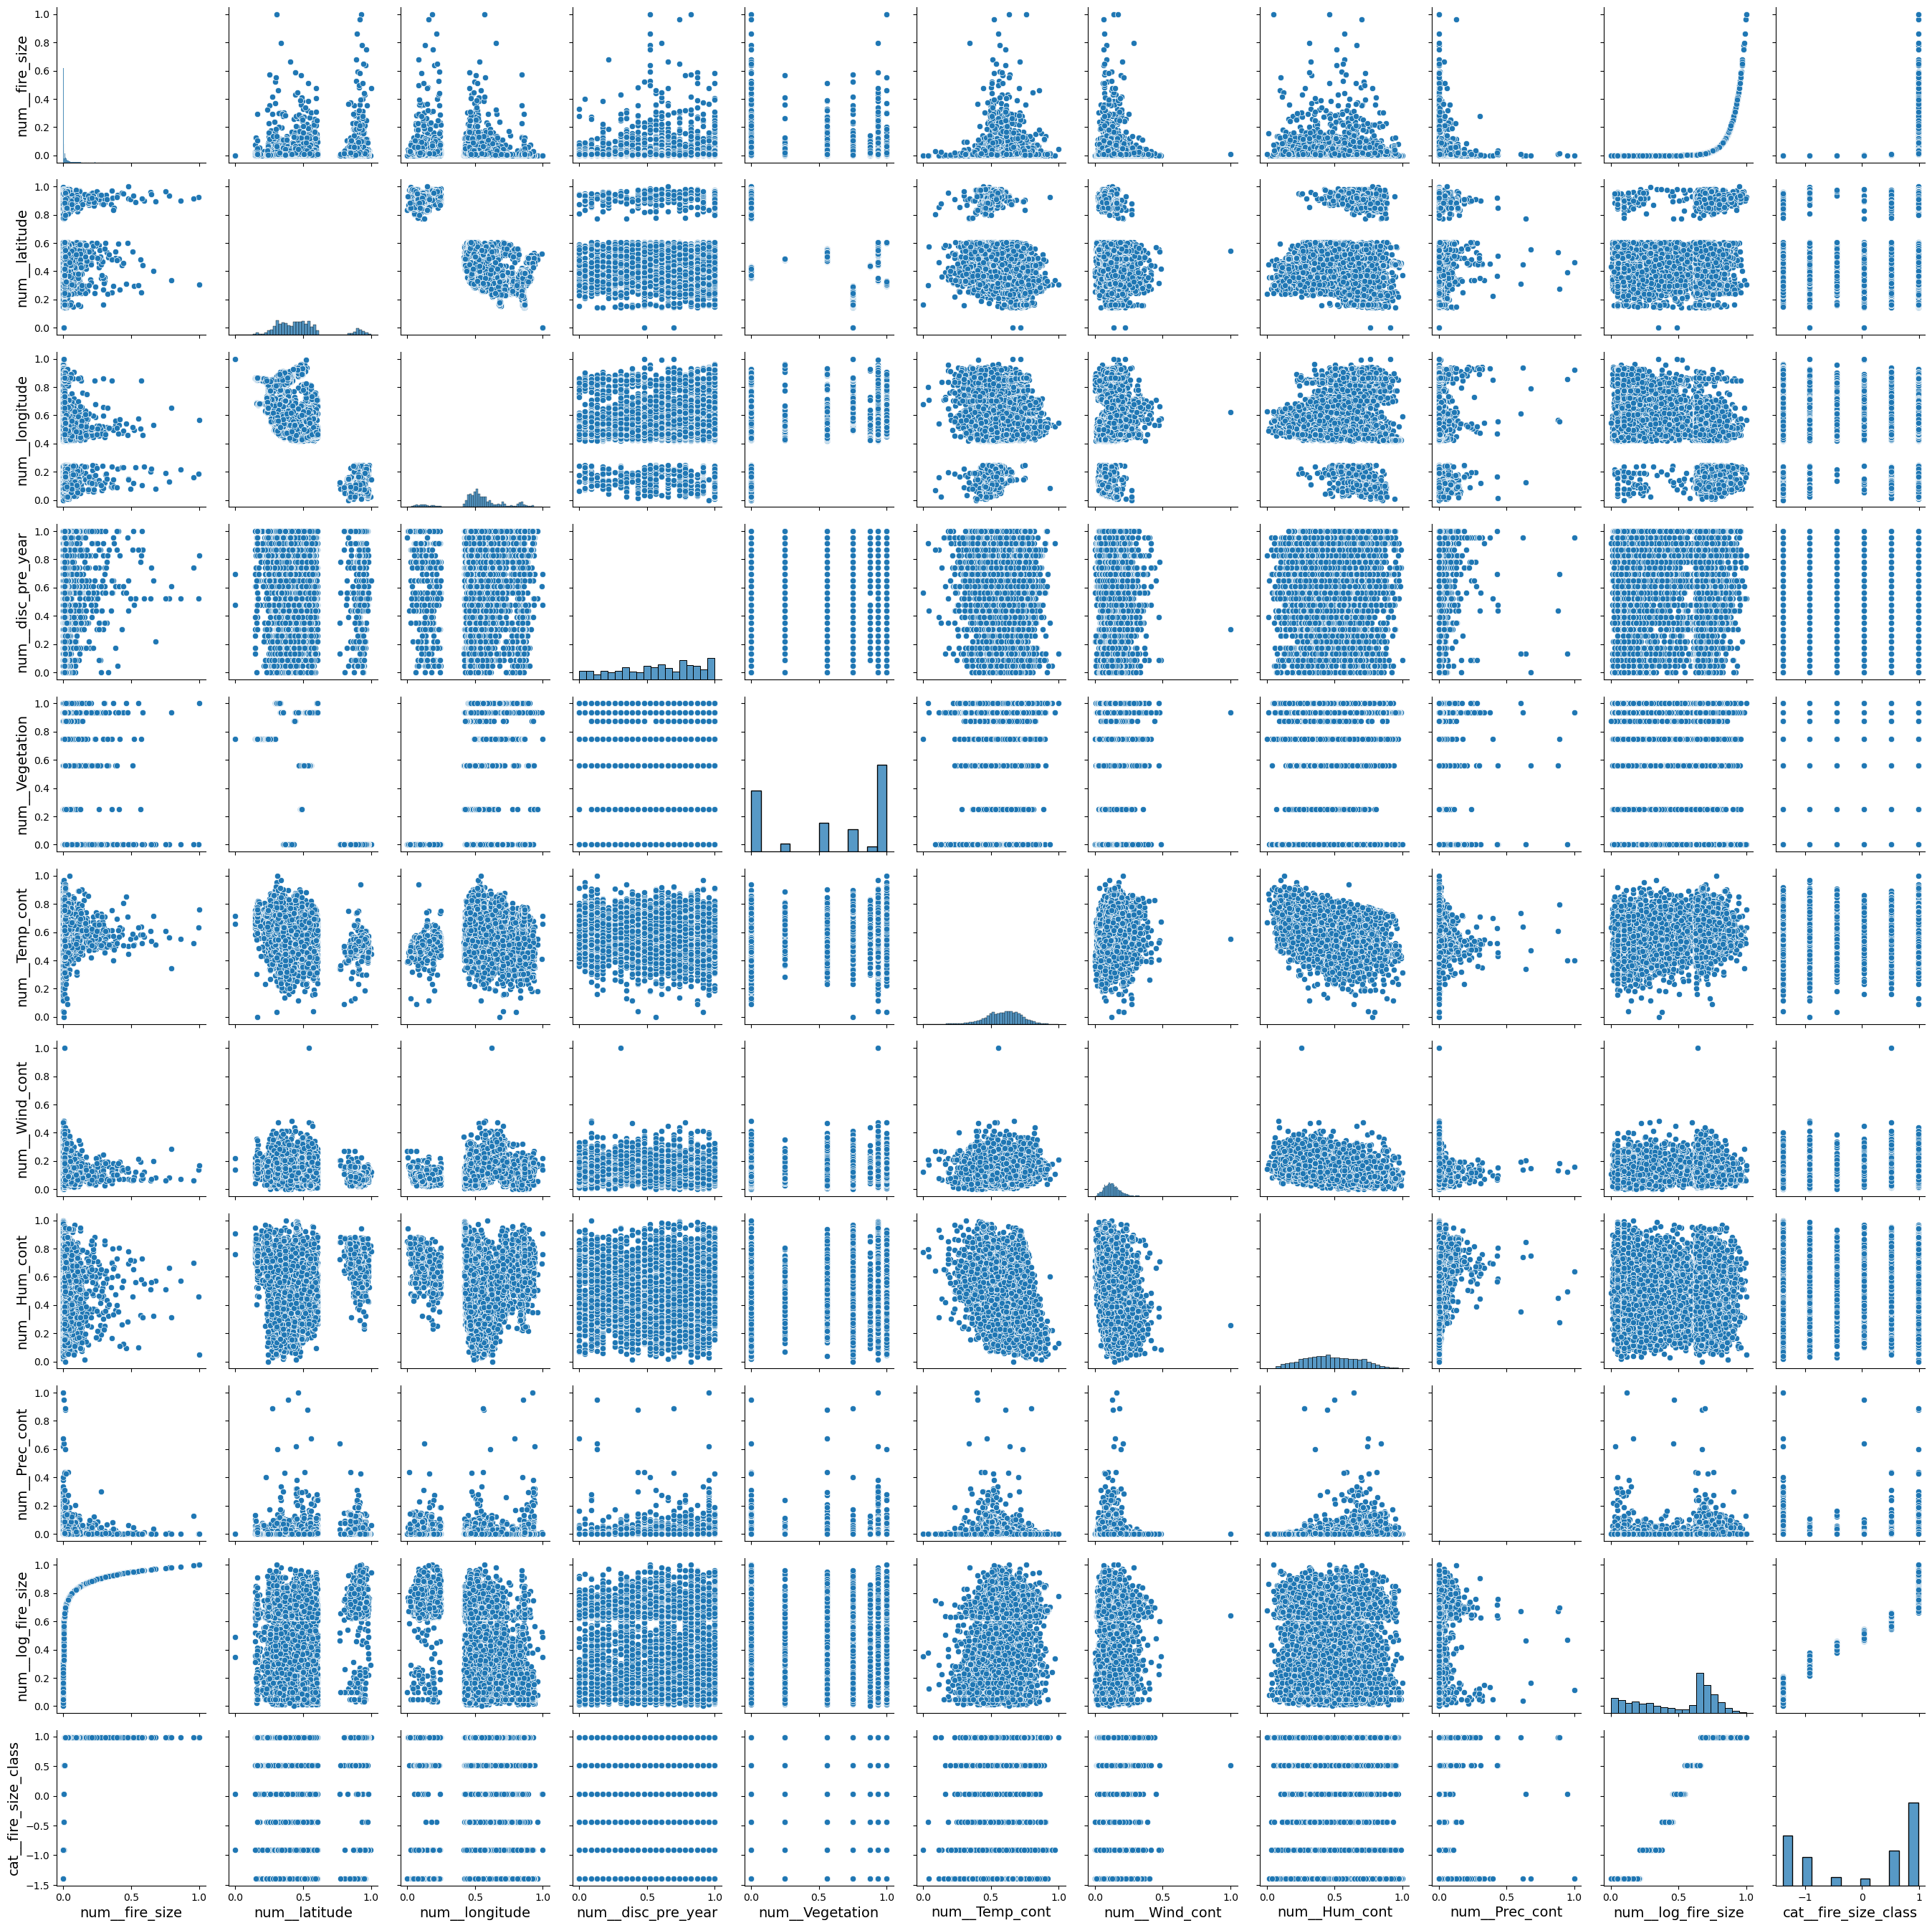

In [74]:
g = sns.PairGrid(pd.DataFrame(X,columns = preprocessor.get_feature_names_out()))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## Creating a training, validation, and test data set
`Sci-kit learn` has several built in functions to facilitate create separate training and test data sets. The simplest one to use is `train_test_split`, which returns the features and targets split into train and test data sets. If we want to also create a validation data set using this function, we will need to split the data set twice.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X,y,test_size=0.5, random_state=42)

In [78]:
X_val, X_test, y_val, y_test = train_test_split(X_test_val,y_test_val,test_size=0.5, random_state=42)

In [79]:
print(X_train.shape,X_val.shape,X_test.shape)

(2945, 11) (1473, 11) (1473, 11)
